In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
%matplotlib qt

In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
def Q(x):
    x1 = x[0]
    x2 = x[1]
    return .5*x1**2 + .5*x2**2 - x1*x2

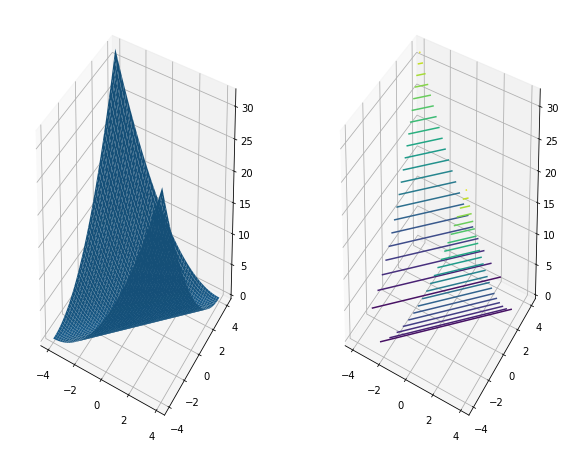

In [3]:
LB = -4
UB = 4
x = np.linspace(LB, UB, 50)
y = np.linspace(LB, UB, 50)
X, Y = np.meshgrid(x, y)

Z = Q([X, Y])

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z)

ax2 = fig.add_subplot(122, projection='3d')
ax2.contour3D(X, Y, Z, levels=30)

plt.show()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 151


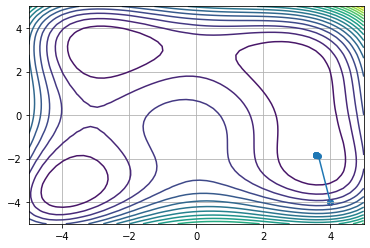

[ 3.58442834 -1.84812653]


In [32]:
def F(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

x0 = np.array([4, -4])
res = minimize(F, x0, method='Powell', options={'disp':True, 'return_all':True})
xs = np.array(res.allvecs)


LB = -5
UB = 5
x = np.linspace(LB, UB, 50)
y = np.linspace(LB, UB, 50)
X, Y = np.meshgrid(x, y)

Z = F([X, Y])

#fig = plt.figure(figsize=(10,8))
#ax1 = fig.add_subplot(111, projection='3d')
#ax1.contour3D(X, Y, Z, levels=20)
#ax1.scatter([x[0] for x in xs], [x[1] for x in xs], c=list(range(len(res.allvecs))), marker='x')

plt.figure()
plt.contour(X, Y, Z, levels=20)
plt.scatter(xs[:,0],xs[:,1])
plt.plot(xs[:,0],xs[:,1])
plt.grid()

plt.show()

print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 22
         Gradient evaluations: 22


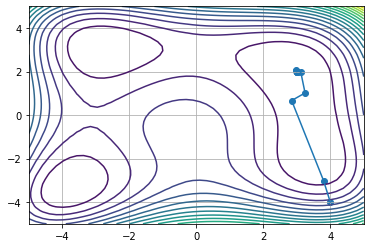

[3. 2.]


In [59]:
def F(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def jacobian(x):
    return np.array( [2*2*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7) , 2*(x[0]**2 + x[1] - 11) + 2*2*x[1]*(x[0] + x[1]**2 - 7)] )

res = minimize(F, x0, method="CG", jac=jacobian, options={'disp':True, 'return_all':True})
xs = np.array(res.allvecs)
plt.figure()
plt.contour(X, Y, Z, levels=20)
plt.scatter(xs[:,0],xs[:,1])
plt.plot(xs[:,0],xs[:,1])
plt.grid()
plt.show()
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15


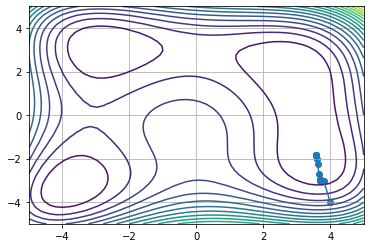

[ 3.58442835 -1.84812653]


In [55]:
def F(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def jacobian(x):
    return np.array( [2*2*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7) , 2*(x[0]**2 + x[1] - 11) + 2*2*x[1]*(x[0] + x[1]**2 - 7)] )

res = minimize(F, x0, method="BFGS", jac=jacobian, options={'disp':True, 'return_all':True})
xs = np.array(res.allvecs)
plt.figure()
plt.contour(X, Y, Z, levels=20)
plt.scatter(xs[:,0],xs[:,1])
plt.plot(xs[:,0],xs[:,1])
plt.grid()
plt.show()
print(res.x)